In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("../diabetes.csv")
print (data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print (data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
# Missing values
print (data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [5]:
# Outcome
print (data["Outcome"].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


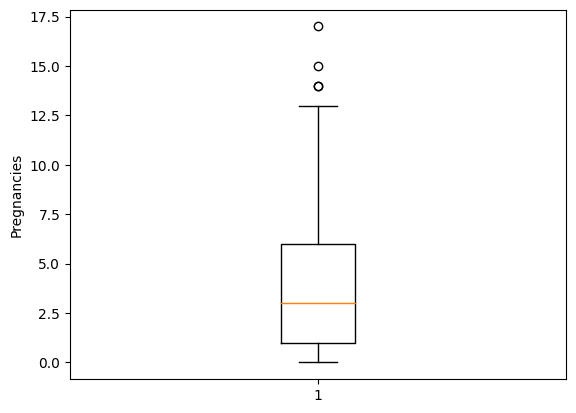

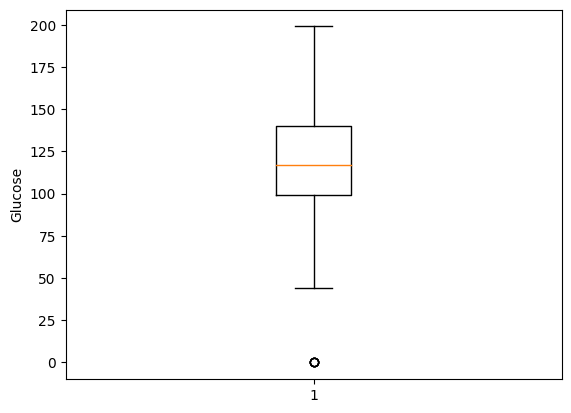

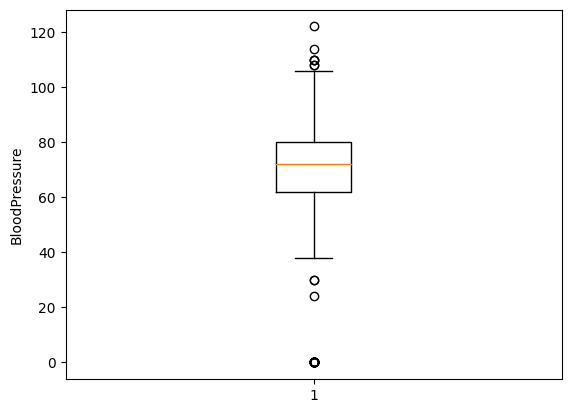

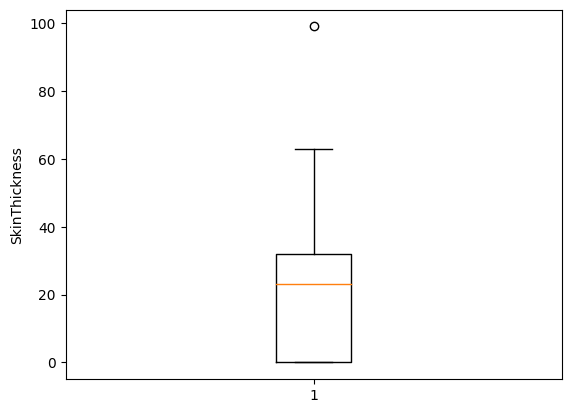

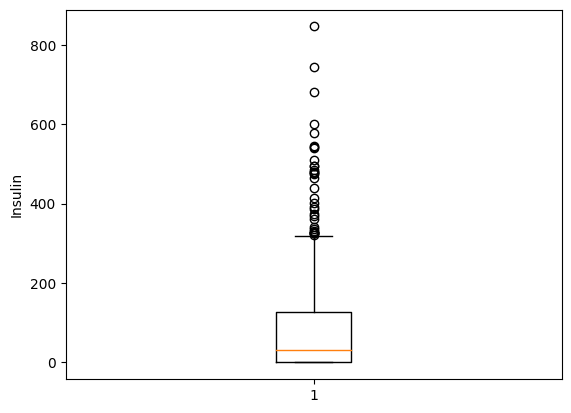

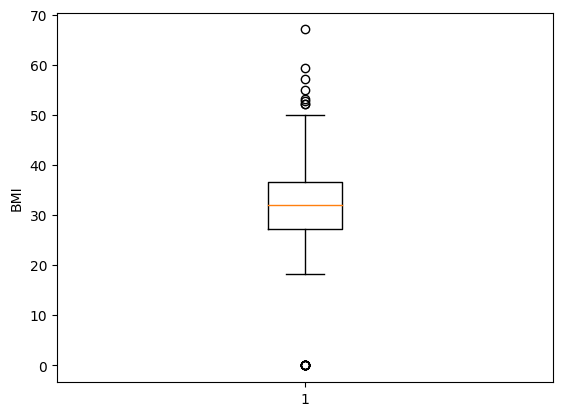

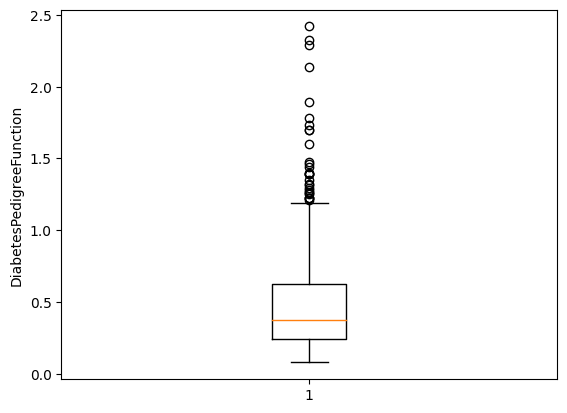

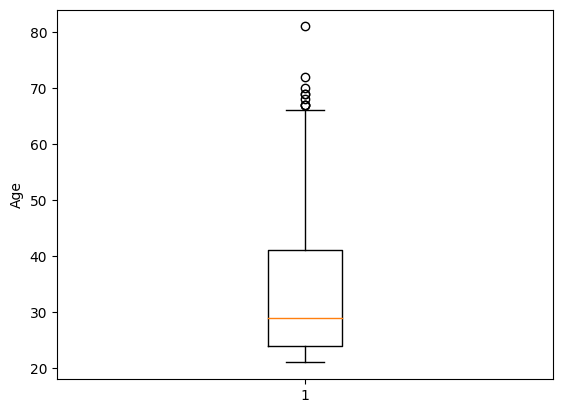

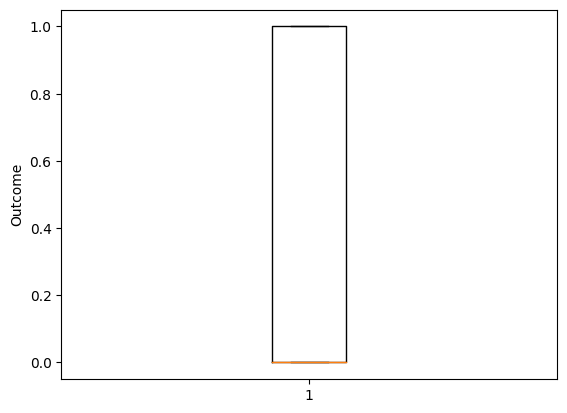

In [6]:
# Outliers
for col in data.columns:
    plt.boxplot(data[col].values)
    plt.ylabel(col)
    plt.show()

In [7]:
for i in range(len(data)):
    if data["BMI"][i] > 50:
        data.drop([i], axis = 0, inplace = True)
    elif data["BMI"][i] < 15:
        data.drop([i], axis = 0, inplace = True)
    elif data["Insulin"][i] > 300:
        data.drop([i], axis = 0, inplace = True)
    elif data["Glucose"][i] < 40:
        data.drop([i], axis = 0, inplace = True)
    elif data["SkinThickness"][i] > 80:
        data.drop([i], axis = 0, inplace = True)

print (data.shape)
data.index = list(range(len(data)))
data.head()

(707, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,3.859972,119.838755,69.603960,19.865629,62.407355,32.070156,0.464406,33.287129,0.333805
std,3.389105,29.634306,18.308078,15.521539,78.000442,6.509792,0.312563,11.662069,0.471905
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,137.500000,80.000000,32.000000,115.000000,36.250000,0.613500,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,300.000000,50.000000,2.288000,81.000000,1.000000


In [9]:
# Standardize
scaler = StandardScaler()

In [10]:
for col in data.columns:
    if data[col].std() > 5:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,707.000000,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,7.070000e+02,707.000000,7.070000e+02,707.000000
mean,3.859972,2.763780e-17,-3.674571e-16,6.030066e-17,-4.396923e-17,1.268826e-16,0.464406,5.527560e-17,0.333805
std,3.389105,1.000708e+00,1.000708e+00,1.000708e+00,1.000708e+00,1.000708e+00,0.312563,1.000708e+00,0.471905
min,0.000000,-2.560966e+00,-3.804509e+00,-1.280781e+00,-8.006562e-01,-2.132169e+00,0.078000,-1.054344e+00,0.000000
25%,1.000000,-7.036948e-01,-3.063089e-01,-1.280781e+00,-8.006562e-01,-7.332850e-01,0.243500,-7.969173e-01,0.000000
50%,3.000000,-1.633978e-01,1.309660e-01,1.376076e-01,-8.006562e-01,-1.078456e-02,0.370000,-3.678733e-01,0.000000
75%,6.000000,5.963949e-01,5.682410e-01,7.823297e-01,6.747382e-01,6.425403e-01,0.613500,6.618321e-01,1.000000
max,17.000000,2.673162e+00,2.863934e+00,2.587552e+00,3.048199e+00,2.756238e+00,2.288000,4.094184e+00,1.000000


In [12]:
# Correlation
corr = data.corr()["Outcome"]
corr

Pregnancies                 0.220565
Glucose                     0.491543
BloodPressure               0.058441
SkinThickness               0.027597
Insulin                     0.087385
BMI                         0.303086
DiabetesPedigreeFunction    0.190188
Age                         0.227323
Outcome                     1.000000
Name: Outcome, dtype: float64

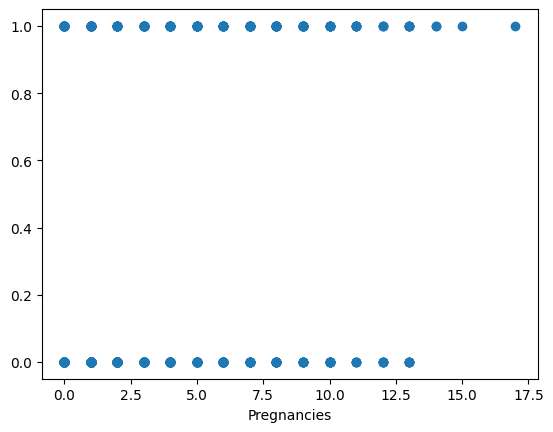

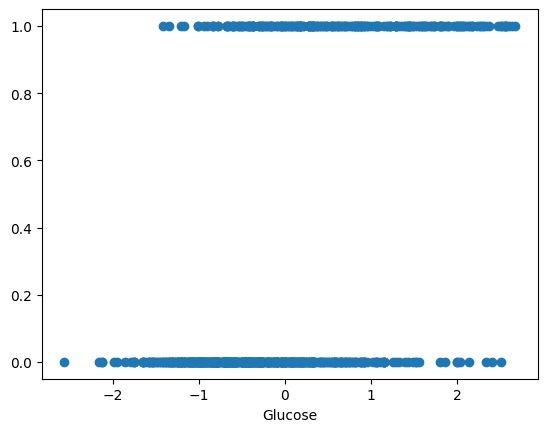

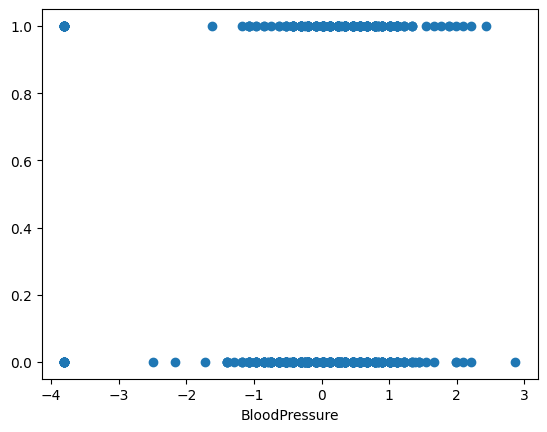

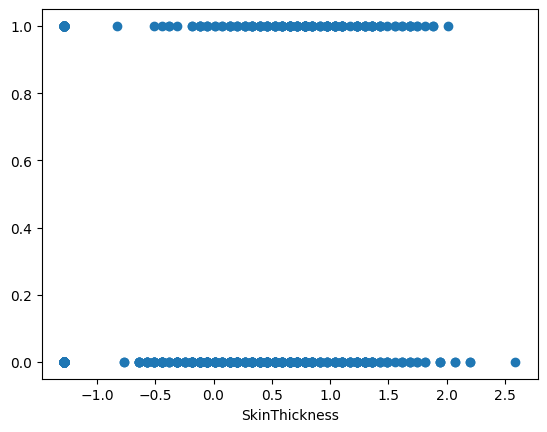

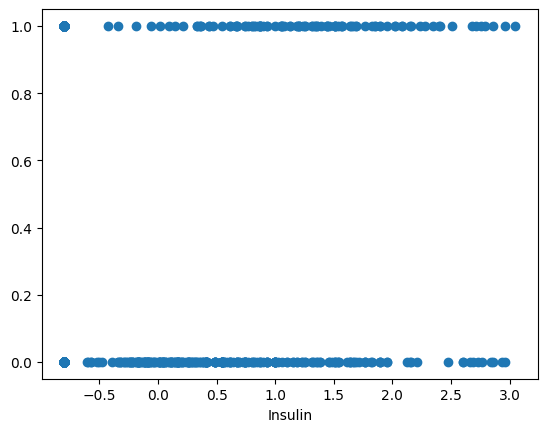

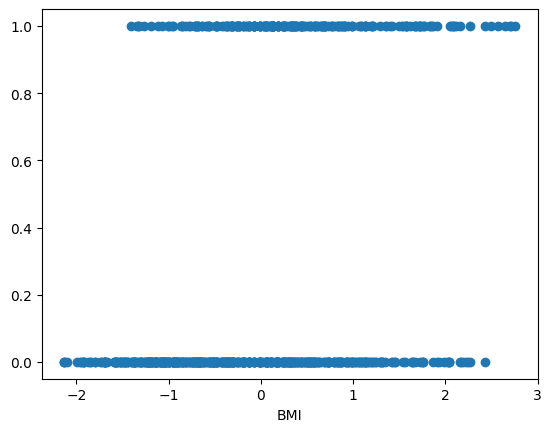

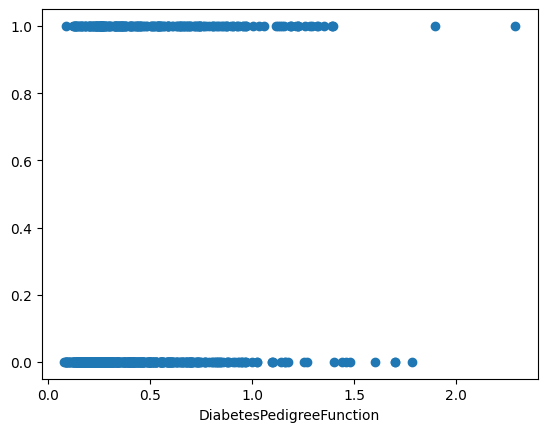

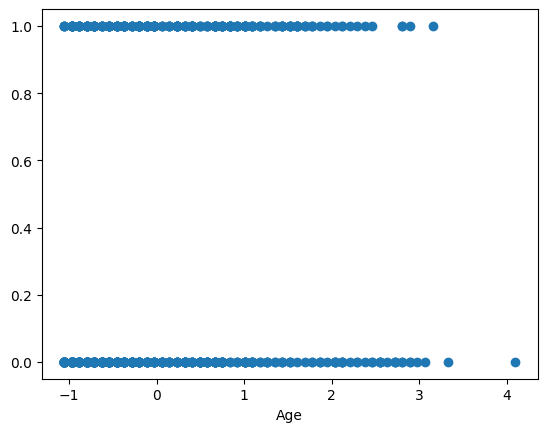

In [13]:
for col in data.columns:
    if col != "Outcome":
        plt.scatter(data[col], data["Outcome"])
        plt.xlabel(col)
        plt.show()

In [14]:
# Save changes
data.to_csv("data.csv", index=False)